<a href="https://colab.research.google.com/github/Sevenc1over/AI-class/blob/main/9%EC%A3%BC%EC%B0%A8/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/TSLA.csv')

X = df[['Open', 'High', 'Low']].values
y = df['Close'].values.reshape(-1, 1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2956, 3)
Shape of y: (2956, 1)


In [2]:
# 2. 정규화 (Scaling)
X_scaler = MinMaxScaler()
X_scaled = X_scaler.fit_transform(X)

y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y)

print("Shape of scaled X:", X_scaled.shape)
print("Shape of scaled y:", y_scaled.shape)

Shape of scaled X: (2956, 3)
Shape of scaled y: (2956, 1)


In [3]:
# 3. 시퀀스 생성
# Create sequences for features (X) and corresponding target (y)
window = 12   # Use the previous 12 data points to predict the next
X_sequences, y_sequences = [], []
for i in range(len(X_scaled) - window):
    X_sequences.append(X_scaled[i : i + window])
    y_sequences.append(y_scaled[i + window])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

print("Shape of X sequences:", X_sequences.shape)
print("Shape of y sequences:", y_sequences.shape)

Shape of X sequences: (2944, 12, 3)
Shape of y sequences: (2944, 1)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=0)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

model = Sequential([
    GRU(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │         8,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,301 (32.43 KB)

 Trainable params: 8,301 (32.43 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

# 얼리 스토핑 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=30, batch_size=8, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.6863e-04 - mae: 0.0074 - val_loss: 2.1743e-04 - val_mae: 0.0119
Epoch 2/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5721e-04 - mae: 0.0068 - val_loss: 1.6303e-04 - val_mae: 0.0072
Epoch 3/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6382e-04 - mae: 0.0071 - val_loss: 1.2031e-04 - val_mae: 0.0050
Epoch 4/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.4906e-04 - mae: 0.0067 - val_loss: 1.2651e-04 - val_mae: 0.0063
Epoch 5/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.4535e-04 - mae: 0.0066 - val_loss: 1.1627e-04 - val_mae: 0.0044
Epoch 6/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.6205e-04 - mae: 0.0064 - val_loss: 1.1921e-04 - val_mae: 0.0044
Epoch 7/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.1765e-04 - mae: 0.0056 - val_loss: 1.2422e-04 - val_mae: 0.0044
Epoch 8/30
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.2123e-04 - mae: 0.0064 - val_loss: 1.3593e-04 - val_mae:

RNN은 같은 데이터 조건에서 56초를, LSTM은 50초를, GRU는 46초를 기록했습니다.

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


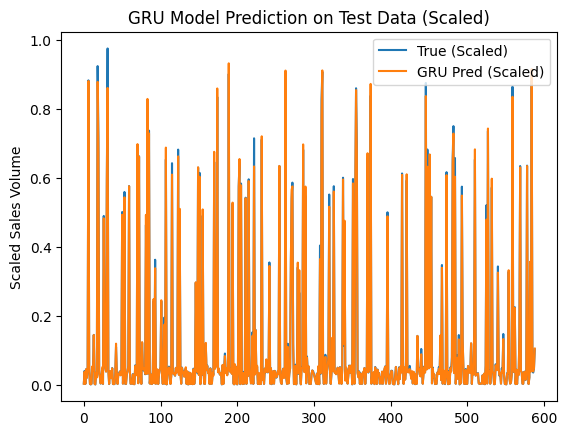

In [8]:
# 7. RNN 모델 예측 및 시각화 (테스트 데이터 사용) - 정규화된 데이터 스케일
pred_gru = model.predict(X_test)
plt.plot(y_test, label='True (Scaled)')
plt.plot(pred_gru, label='GRU Pred (Scaled)')
plt.legend(); plt.title('GRU Model Prediction on Test Data (Scaled)'); plt.ylabel('Scaled Sales Volume'); plt.show()